<a href="https://colab.research.google.com/github/msa1997/ads-2023/blob/main/HW9_ADS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading data from Kaggle

### We load the datasets directly from Kaggle.

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! echo "{\"username\":\"mohammadaliysz\",\"key\":\"e8f68a5df34c6dc24642db4faf2c79c5\"}" > kaggle.json
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d rashikrahmanpritom/heart-attack-analysis-prediction-dataset
!kaggle datasets download -d mirichoi0218/insurance

  0% 0.00/4.11k [00:00<?, ?B/s]
100% 4.11k/4.11k [00:00<00:00, 7.80MB/s]
  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 33.1MB/s]


In [ ]:
!unzip heart-attack-analysis-prediction-dataset
!unzip insurance

Archive:  heart-attack-analysis-prediction-dataset.zip
  inflating: heart.csv               
  inflating: o2Saturation.csv        
Archive:  insurance.zip
  inflating: insurance.csv           


# Library

In [ ]:
from IPython.display import clear_output

import pandas as pd
import io
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt
import pylab as pl



# Datasets

For this assignment, we used two different datasets. The first dataset ,used previously in *Assignment 5*, is **heart attack analysis**. which we will use to do the Classification part of this assignment.
The second dataset ,which we will use to do the Regression part is the **insurance** dataset.

Since we are already familiar with these datasets, we will skip the dataset full description.

### Classification Dataset (heart attack)

In [ ]:
clf_df = pd.read_csv('heart.csv')
print(clf_df.shape)
clf_df.head(6)

(303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


In [ ]:
clf_df['output'].value_counts()


1    165
0    138
Name: output, dtype: int64

In [ ]:
clf_df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
clf_categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
clf_continuous_features = ['age', 'oldpeak', 'trtbps', 'chol', 'thalachh']
clf_output = clf_df['output']

### Regression Dataset (insurance)

In [ ]:
reg_df = pd.read_csv('insurance.csv')
print(reg_df.shape)
reg_df.head(6)

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [ ]:
reg_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
reg_categorical_features = ['sex', 'children', 'smoker', 'region']
reg_continuous_features = ['age', 'bmi']
reg_output = reg_df['charges']

In [ ]:
reg_df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
reg_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
reg_df.groupby(['smoker']).mean()["charges"]

<ipython-input-37-bfdf91e391a7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  reg_df.groupby(['smoker']).mean()["charges"]


smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [ ]:
reg_df.groupby(['region']).mean()["charges"]

<ipython-input-38-f4be4fb16e34>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  reg_df.groupby(['region']).mean()["charges"]


region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

In [ ]:
# Define your custom mapping as a dictionary

label_mapping = {
    'southeast': 4,
    'northeast': 3,
    'northwest': 2,
    'southwest': 1
}

# Assume you have a list of labels
labels = ['southeast', 'northeast', 'northwest', 'southwest']

# Use the map function of a pandas Series to apply the mapping
labels_series = pd.Series(labels)
encoded_labels = labels_series.map(label_mapping)

# Use the replace method to encode the 'labels' column
reg_df['region_labels'] = reg_df['region'].replace(label_mapping)
reg_df=reg_df.drop(['region'],axis=1)


print(encoded_labels.tolist())


[4, 3, 2, 1]


In [ ]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
encoder = LabelEncoder()
binarizer = LabelBinarizer()

reg_df[['sex']] = binarizer.fit_transform(reg_df[['sex']])
reg_df[['smoker']] = binarizer.fit_transform(reg_df[['smoker']])
reg_df=reg_df.drop(['charges'],axis=1)
reg_df

,age,sex,bmi,children,smoker,region_labels
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,4
2,28,1,33.000,3,0,4
3,33,1,22.705,0,0,2
4,32,1,28.880,0,0,2
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2
1334,18,0,31.920,0,0,3
1335,18,0,36.850,0,0,4
1336,21,0,25.800,0,0,1


## Spiliting Dataset

In [ ]:
#@title Split Dataset
test_frac = 0.2 #@param {type:"number"}
from sklearn.model_selection import train_test_split

clf_X_train, clf_X_test, clf_y_train, clf_y_test = train_test_split(clf_df.drop('output',axis=1),
                                                                    clf_output,
                                                                    test_size=test_frac, random_state=0)

In [ ]:
test_frac = 0.2
reg_X_train, reg_X_test, reg_y_train, reg_y_test = train_test_split(reg_df,
                                                                    reg_output,
                                                                    test_size=test_frac, random_state=0)

#### Normalization/Standardization of Data

In [ ]:
from sklearn.preprocessing import StandardScaler

# Save the column names and index
column_names = clf_df.drop('output',axis=1).columns
index = clf_X_train.index

clf_scaler = StandardScaler()
# Don't cheat! - fit only on training data

clf_scaler.fit(clf_X_train)
clf_X_train = clf_scaler.transform(clf_X_train)

# Convert the scaled data back to a DataFrame
clf_X_train = pd.DataFrame(clf_X_train, columns=column_names, index=index)

In [ ]:
reg_scaler = StandardScaler()
# Don't cheat - fit only on training data
reg_scaler.fit(reg_X_train)
reg_X_train = reg_scaler.transform(reg_X_train)


### First, we do the Binary Classification problem using the 3 requested libraries (`Scikit-Learn`, `Keras` and `PyTorch`), then we go to the Regression problem and do the same procedure.

# Classification

### Scikit-Learn

The code of multi-layer perceptron is straightforward. We first initialize a class of type `MLPClassifier`, which has many parameters, including solver, the algorithm to use to solve the optimization problem. The `sgd` solver is a robust and flexible method that can work well in many binary classification scenarios, provided the data and the problem characteristics align well with the strengths of the SGD approach.. `hidden_layer_size` parameter refers to the shape of our network. After that, we will fit the classifier on our data and evaluate it on the test set.

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(100, 10, 25), activation='tanh', solver='sgd',
                    alpha=1e-7, batch_size='auto', learning_rate='adaptive',
                    learning_rate_init=0.001, max_iter=250, early_stopping=True,
                    validation_fraction=0.1, n_iter_no_change=10, random_state=42)
# Fit the model
clf.fit(clf_X_train, clf_y_train)

MLPClassifier(activation='tanh', alpha=1e-07, early_stopping=True,
              hidden_layer_sizes=(100, 10, 25), learning_rate='adaptive',
              max_iter=250, random_state=42, solver='sgd')

In [ ]:
# Make predictions
predictions = clf.predict(clf_X_test)

# Calculate F1 score
from sklearn.metrics import f1_score
f1 = f1_score(clf_y_test, predictions)

print(f1)


0.7567567567567567


We get F1-Score above %75 by using Multilayer Perceptron with Scikit-Learn

### Keras

Using Tensorflow sequential API makes it easy to create different types of networks. We first create the model using instantiating the class of tf.models.Sequential, and after that, we will add the layers and corresponding activation function to it.  
Note that we use the `ReLU` activation function for internal layers, while we use the `sigmoid` function for the last layer as this is a classification task.   
Finally, we will fit the model on our training data and evaluate it on the test set using our custom f1-score function.

In [ ]:
%pip install tensorflow_addons
import tensorflow as tf
import tensorflow_addons as tfa

from keras.models import Sequential
from keras.layers import Dense
from keras import callbacks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 8.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
model = Sequential()

# Add a layer with 100 hidden neurons
model.add(Dense(150, input_dim=clf_X_train.shape[1], activation='tanh'))

model.add(Dense(50, activation='relu'))

model.add(Dense(15, activation='tanh'))

# Add the output layer, with sigmoid activation fuction (for binary classification)
model.add(Dense(1, activation='sigmoid'))


In [ ]:
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,          # minimium amount of change to be considered an improvement
    patience=20,              # number of epochs to wait before deciding there is no significant improvement in training
    restore_best_weights=True,
)

In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
    metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall()],
    )

In [ ]:
history = model.fit(clf_X_train, clf_y_train,
                    batch_size = 16,
                    epochs = 200,
                    validation_split=0.2,
                    callbacks=[early_stopping]
                    )

Epoch 1/200
13/13 [==============================] - 1s 29ms/step - loss: 0.6893 - precision_10: 0.6429 - recall_10: 0.6667 - val_loss: 0.6340 - val_precision_10: 0.6129 - val_recall_10: 0.8261
Epoch 2/200
13/13 [==============================] - 0s 7ms/step - loss: 0.6735 - precision_10: 0.6048 - recall_10: 0.6944 - val_loss: 0.6855 - val_precision_10: 0.5000 - val_recall_10: 1.0000
Epoch 3/200
13/13 [==============================] - 0s 6ms/step - loss: 0.6562 - precision_10: 0.6555 - recall_10: 0.7222 - val_loss: 0.6017 - val_precision_10: 0.7222 - val_recall_10: 0.5652
Epoch 4/200
13/13 [==============================] - 0s 7ms/step - loss: 0.6416 - precision_10: 0.6579 - recall_10: 0.6944 - val_loss: 0.6008 - val_precision_10: 0.7727 - val_recall_10: 0.7391
Epoch 5/200
13/13 [==============================] - 0s 6ms/step - loss: 0.6371 - precision_10: 0.6807 - recall_10: 0.7500 - val_loss: 0.6422 - val_precision_10: 0.8000 - val_recall_10: 0.3478
Epoch 6/200
13/13 [===============

In [ ]:
predictions = model.predict(clf_X_test)
print('F1-score is %.2f' %f1_score(clf_y_test, predictions>0.4))

2/2 [==============================] - 0s 8ms/step
F1-score is 0.81


We get F1-Score above %75 by using 4-layer feedforward network with Keras

### PyTorch

Using the **PyTorch** library is quite similar to Tensorflow. The PyTorch library has a similar API to Tensorflow's Sequential API, but in this part, we will use the standard PyTorch API. First, we will transform the training and test data arrays to PyTorch tensors. After that, we create a model using PyTorch API. In the __init__ method of this class, we will initialize different linear layers of the model.  
The difference between PyTorch and Tensorflow is that in PyTorch, we need to know the shape of our input layer, while in Tensorflow, the library can find that itself. In the forward method, we will specify how the model's components interact with each other. The other difference between PyTorch and Tensorflow is that we should write the training loop ourselves in PyTorch, while in Tensorflow, the framework will take this part over. Finally, like other parts, we will evaluate the model on the test set.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from torch import Tensor

In [ ]:
# transform to torch tensor
tensor_X_train = Tensor(clf_X_train.values.astype(np.float32))
tensor_y_train = Tensor(clf_y_train.values.astype(np.float32))
tensor_X_test = Tensor(clf_X_test.values.astype(np.float32))
tensor_y_test = Tensor(clf_y_test.values.astype(np.float32))

# create the datset
train_set = TensorDataset(tensor_X_train,tensor_y_train)
test_set = TensorDataset(tensor_X_test,tensor_y_test)


# create your dataloader
train_dl = DataLoader(train_set,batch_size=32, shuffle=True)
test_dl = DataLoader(test_set,batch_size=32, shuffle=True)

In [ ]:
layers = []
layers.append(nn.Linear(clf_X_train.shape[1], 100))
layers.append(nn.Tanh())

layers.append(nn.Linear(100, 50))
layers.append(nn.ReLU())

layers.append(nn.Linear(50, 15))
layers.append(nn.Tanh())

# Add the output layer, with sigmoid activation fuction (for binary classification)
layers.append(nn.Linear(15, 1))
layers.append(nn.Sigmoid())

model = nn.Sequential(*layers)

In [ ]:
# define the optimization
from torch.nn import BCELoss
from torch.optim import Adam

criterion = BCELoss()
optimizer = Adam(model.parameters(), lr=0.0005)


In [ ]:
for epoch in range(100):
    running_loss = 0.0
    all_predictions = []
    all_targets = []

    for i, (inputs, targets) in enumerate(train_dl):
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs).squeeze()
        loss = criterion(outputs, targets)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Convert outputs and targets to the same shape for F1 score calculation
        predictions = outputs.argmax(dim=1) if outputs.dim() > 1 else outputs.round()
        all_predictions.append(predictions.detach().cpu().numpy())
        all_targets.append(targets.cpu().numpy())

    # Calculate F1 score at the end of the epoch
    all_predictions = np.concatenate(all_predictions)
    all_targets = np.concatenate(all_targets)
    f1 = f1_score(all_targets, all_predictions, average='binary')  # or 'binary' for binary classification

    # Evaluation part
    model.eval()  # Set the model to evaluation mode
    val_predictions = []
    val_targets = []

    with torch.no_grad():  # No need to track gradients during evaluation
        for inputs, targets in test_dl:
            outputs = model(inputs).squeeze()

            # Convert outputs to predictions
            predictions = outputs.argmax(dim=1) if outputs.dim() > 1 else outputs.round()
            val_predictions.append(predictions.cpu().numpy())
            val_targets.append(targets.cpu().numpy())

    # Calculate F1 score on the validation set
    val_predictions = np.concatenate(val_predictions)
    val_targets = np.concatenate(val_targets)
    val_f1 = f1_score(val_targets, val_predictions, average='macro')  # or 'binary' for binary classification

    # Print F1 score along with training loss
    print('After %d epoch : [%d] Training loss: %.3f, Validation F1 Score: %.3f' % (epoch, epoch + 1, running_loss / len(train_dl), val_f1))

    if val_f1 >= 0.75:
      break;

    running_loss = 0.0
    model.train()

After 0 epoch : [1] Training loss: 0.044, Validation F1 Score: 0.579
After 1 epoch : [2] Training loss: 0.041, Validation F1 Score: 0.689
After 2 epoch : [3] Training loss: 0.051, Validation F1 Score: 0.579
After 3 epoch : [4] Training loss: 0.058, Validation F1 Score: 0.638
After 4 epoch : [5] Training loss: 0.044, Validation F1 Score: 0.619
After 5 epoch : [6] Training loss: 0.052, Validation F1 Score: 0.579
After 6 epoch : [7] Training loss: 0.039, Validation F1 Score: 0.671
After 7 epoch : [8] Training loss: 0.045, Validation F1 Score: 0.654
After 8 epoch : [9] Training loss: 0.041, Validation F1 Score: 0.671
After 9 epoch : [10] Training loss: 0.042, Validation F1 Score: 0.619
After 10 epoch : [11] Training loss: 0.035, Validation F1 Score: 0.616
After 11 epoch : [12] Training loss: 0.034, Validation F1 Score: 0.671
After 12 epoch : [13] Training loss: 0.037, Validation F1 Score: 0.616
After 13 epoch : [14] Training loss: 0.033, Validation F1 Score: 0.654
After 14 epoch : [15] Tra

We get Validation F1-Score above %75 by using PyTorch

### Non-Sequential Keras

A non-sequential feedforward network in Keras refers to a neural network architecture where the data flow is not strictly linear or sequential. In a typical sequential model, each layer has one input (coming from the previous layer) and one output (going to the next layer). However, non-sequential (or non-linear) architectures allow for more complex connections, such as:

  

1.   **Skip Connections:** Layers can skip one or more layers and connect to further layers down the network. This is a key feature in architectures like Residual Networks (ResNets).

2.   **Branching:** The network can split into branches, where different branches might process the input differently and then the results are merged back. This is seen in architectures like Inception networks.


3.   **Multiple Inputs or Outputs:** The network can have multiple input or output layers, useful for multi-modal data or multi-task learning.


In Keras, such non-sequential models are typically built using the Functional API, which provides more flexibility than the Sequential API. With the Functional API, you explicitly define the input and output for each layer, which allows you to create complex network architectures.

In [ ]:
from keras.layers import Add, Concatenate, Dense, Input
from keras.models import Model
import tensorflow as tf

In [ ]:
input_layer = Input(shape=(clf_X_train.shape[1],))

hidden_layer_1 = Dense(200, activation='relu')(input_layer)
hidden_layer_2 = Dense(100, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(10, activation='relu')(hidden_layer_2)
output_layer = Dense(1, activation='sigmoid')(hidden_layer_3)

model = Model(inputs=input_layer, outputs=output_layer)

In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall()],
    )
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_30 (Dense)            (None, 200)               2800      
                                                                 
 dense_31 (Dense)            (None, 100)               20100     
                                                                 
 dense_32 (Dense)            (None, 10)                1010      
                                                                 
 dense_33 (Dense)            (None, 1)                 11        
                                                                 
Total params: 23921 (93.44 KB)
Trainable params: 23921 (93.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##### visualizing the network
In addition to viewing the summary of the model, we can visualize the structure as well!

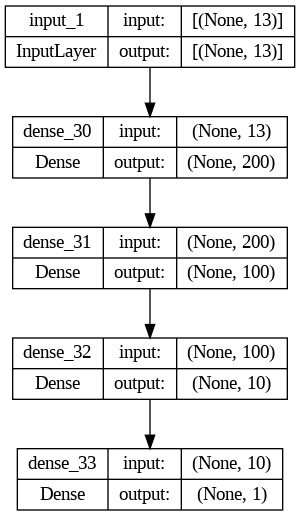

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

In [ ]:
history = model.fit(clf_X_train, clf_y_train,
                    batch_size = 16,
                    epochs = 150,
                    validation_split=0.2,
                    )

Epoch 1/150
13/13 [==============================] - 2s 41ms/step - loss: 2.2539 - precision_12: 0.5752 - recall_12: 0.6019 - val_loss: 0.9492 - val_precision_12: 0.5385 - val_recall_12: 0.9130
Epoch 2/150
13/13 [==============================] - 0s 10ms/step - loss: 1.0894 - precision_12: 0.6174 - recall_12: 0.6574 - val_loss: 1.8981 - val_precision_12: 0.0000e+00 - val_recall_12: 0.0000e+00
Epoch 3/150
13/13 [==============================] - 0s 11ms/step - loss: 1.7198 - precision_12: 0.5778 - recall_12: 0.4815 - val_loss: 0.6844 - val_precision_12: 0.6429 - val_recall_12: 0.7826
Epoch 4/150
13/13 [==============================] - 0s 11ms/step - loss: 0.9360 - precision_12: 0.6939 - recall_12: 0.6296 - val_loss: 1.2534 - val_precision_12: 0.5000 - val_recall_12: 1.0000
Epoch 5/150
13/13 [==============================] - 0s 9ms/step - loss: 0.6644 - precision_12: 0.7064 - recall_12: 0.7130 - val_loss: 1.3015 - val_precision_12: 0.4894 - val_recall_12: 1.0000
Epoch 6/150
13/13 [====

In [ ]:
predictions = model.predict(clf_X_test)
print('Macro F1-score is %.2f' %f1_score(clf_y_test, predictions>0.4, average='binary'))

2/2 [==============================] - 0s 7ms/step
Macro F1-score is 0.84


# Regression

Using the Scikit-Learn library to do the Regression is quite similar to classifying using this library. The only difference is that we use the `adam` optimizer as the `lbfgs` does not work well on our problem.

### Scikit-Learn

We use **Grid Search** to fine tune the MLP Regressor. After that we use the best parametrs to build our model.

In [ ]:
# from sklearn.neural_network import MLPRegressor
# from sklearn.model_selection import GridSearchCV
# from sklearn.datasets import make_regression


# # Define a MLPRegressor
# mlp = MLPRegressor(max_iter=1000)

# # Define a parameter grid to search for best parameters for everything in the pipeline
# param_grid = {
#     'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
#     'activation': ['tanh', 'relu'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant','adaptive'],
# }

# # Create Grid Search
# grid = GridSearchCV(estimator=mlp, param_grid=param_grid, n_jobs=-1, cv=3)
# grid.fit(reg_X_train, reg_y_train)

# # View The Best Parameters
# print("Best parameters found: ", grid.best_params_)
# print("Best score (mean cross-validated score of the best_estimator): ", grid.best_score_)

# # Test the model with the best parameters
# best_mlp = grid.best_estimator_
# # Predict on the test set
# y_pred = best_mlp.predict(reg_X_test)

# # Calculate R2 score
# r2_test_score = r2_score(reg_y_test, y_pred)
# print("R2 score on test set: ", r2_test_score)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
22 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
22 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 749, in fit
    return self._fit(X, y, incremental=False)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 491, in _fit
    raise ValueError(
ValueError: So

Best parameters found:  {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
Best score (mean cross-validated score of the best_estimator):  0.777975429859933
R2 score on test set:  0.8093107512486746


In [ ]:
#@title Model
from sklearn.neural_network import MLPRegressor
reg = MLPRegressor( activation = 'relu', alpha=1e-4, hidden_layer_sizes=(50, 100, 50),learning_rate = 'adaptive',
                   solver = 'adam', max_iter=1000, random_state=0)
reg.fit(reg_X_train, reg_y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(50, 100, 50), learning_rate='adaptive',
             max_iter=1000, random_state=0)

In [ ]:
#@title Evaluation
from sklearn.metrics import r2_score
r2_score(reg_y_test, reg.predict(reg_X_test))

0.8615471683632616

### Keras

Using sequential API for Regression is also quite similar to classification. The only difference is that we did not use any activation function in the last layer of the model not to restrict the model's output value. This change is also applied to all other models.

In [ ]:
#@title Model
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

#### We write R2-Score as a function

In [ ]:
from keras import backend as K

def R2_Score(y_true, y_pred):

    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - (SS_res)/(SS_tot + K.epsilon()) )

In [ ]:
model.compile(
  loss='mse',
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
  metrics=[R2_Score],
)

In [ ]:
#@title Model Training
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
model.fit(reg_X_train, reg_y_train, epochs=200, callbacks=[early_stopping])

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 25444156.0000 - R2_Score: 0.7771
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 26819006.0000 - R2_Score: 0.7891
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 25261058.0000 - R2_Score: 0.8090
Epoch 4/200
34/34 [==============================] - 0s 5ms/step - loss: 25770490.0000 - R2_Score: 0.7968
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 24483052.0000 - R2_Score: 0.7925
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 24916342.0000 - R2_Score: 0.8109
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 25798380.0000 - R2_Score: 0.8005
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 25146692.0000 - R2_Score: 0.8146
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 24396778.0000 - R2_Score: 0.8107
Epoch 10/200
34/34 [==========================

In [ ]:
#@title Model Evaluation
model.evaluate(reg_X_test, reg_y_test)

9/9 [==============================] - 0s 3ms/step - loss: 19099674.0000 - R2_Score: 0.8698


[19099674.0, 0.8698294162750244]

We get R2-Score above %75 by using 4-layer feedforward network with Keras

### PyTorch

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

#### The number of input neurons should be same as the number of featuers.

In [ ]:
reg_X_train_tensor, reg_y_train_tensor, reg_X_test_tensor, reg_y_test_tensor = map(np.array, (reg_X_train,
                                                                                              reg_y_train,
                                                                                              reg_X_test,
                                                                                              reg_y_test))

reg_X_train_tensor = reg_X_train_tensor.astype(np.float32)
reg_y_train_tensor = reg_y_train_tensor.astype(np.float32)
reg_X_test_tensor = reg_X_test_tensor.astype(np.float32)
reg_y_test_tensor = reg_y_test_tensor.astype(np.float32)

reg_X_train_tensor, reg_y_train_tensor, reg_X_test_tensor, reg_y_test_tensor = map(torch.tensor, (reg_X_train_tensor,
                                                                                                  reg_y_train_tensor,
                                                                                                  reg_X_test_tensor,
                                                                                                  reg_y_test_tensor))

In [ ]:
# create the datset
from torch.utils.data import TensorDataset
train_set = TensorDataset(tensor_X_train,tensor_y_train)
test_set = TensorDataset(tensor_X_test,tensor_y_test)

# create your dataloader
train_dl = DataLoader(train_set,batch_size=8, shuffle=True)
test_dl = DataLoader(test_set,batch_size=8, shuffle=True)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import r2_score

# Define your model class with an additional 'activation' parameter
class Model(nn.Module):
    def __init__(self, n1, n2, n3, n4, activation):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(13, n1)
        self.fc2 = nn.Linear(n1, n2)
        self.fc3 = nn.Linear(n2, n3)
        self.fc4 = nn.Linear(n3, n4)
        self.fc5 = nn.Linear(n4, 1)
        self.activation = activation

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.activation(self.fc3(x))
        x = F.tanh(self.fc4(x))
        x = self.fc5(x)
        return x

In [ ]:
#@title Model Initialization
# Initialize model, loss, and optimizer with current set of parameters
model = Model(100,70,60,50, F.relu)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

In [ ]:
import numpy as np
from sklearn.metrics import r2_score

for epoch in range(500):
    running_loss = 0.0
    all_predictions = []
    all_targets = []

    for i, (inputs, targets) in enumerate(train_dl):
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        # print(inputs.size())
        outputs = model(inputs).squeeze()
        loss = criterion(outputs, targets)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        all_predictions.append(outputs.detach().cpu().numpy())
        all_targets.append(targets.cpu().numpy())

    # Calculate R2 score at the end of the epoch
    all_predictions = np.concatenate(all_predictions)
    all_targets = np.concatenate(all_targets)
    r2 = r2_score(all_targets, all_predictions)

    # Evaluation part
    model.eval()  # Set the model to evaluation mode
    val_predictions = []
    val_targets = []

    with torch.no_grad():  # No need to track gradients during evaluation
        for inputs, targets in test_dl:
            outputs = model(inputs).squeeze()
            val_predictions.append(outputs.cpu().numpy())
            val_targets.append(targets.cpu().numpy())

    # Calculate R2 score on the validation set
    val_predictions = np.concatenate(val_predictions)
    val_targets = np.concatenate(val_targets)
    val_r2 = r2_score(val_targets, val_predictions)

    # Break if validation R2 score is satisfactory
    if val_r2 >= 0.8:
        print('Stopping early as validation R2 Score reached the threshold.')
        break

    running_loss = 0.0
    model.train()  # Set the model back to training mode

print('Validation R2 Score: %.3f' % (epoch,val_r2))

Validation R2 Score: 0.821


### Non-Sequential Keras

In [ ]:
from keras.layers import Add, Concatenate, Dense, Input
from keras.models import Model
import tensorflow as tf

In [ ]:
#@title Model Initialization
input_layer = Input(shape=(reg_X_train.shape[1],))
hidden_layer_1 = Dense(200, activation='relu')(input_layer)
hidden_layer_2 = Dense(100, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(10, activation='relu')(hidden_layer_2)
output_layer = Dense(1, activation=None)(hidden_layer_3)

model = Model(inputs=input_layer, outputs=output_layer)

In [ ]:
# Define a custom R2 score metric
def R2_Score(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

In [ ]:
model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    metrics=[R2_Score],
    )
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense_46 (Dense)            (None, 200)               1400      
                                                                 
 dense_47 (Dense)            (None, 100)               20100     
                                                                 
 dense_48 (Dense)            (None, 10)                1010      
                                                                 
 dense_49 (Dense)            (None, 1)                 11        
                                                                 
Total params: 22521 (87.97 KB)
Trainable params: 22521 (87.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


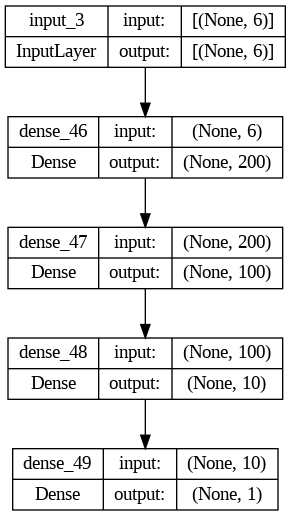

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

In [ ]:
#@title Model Training
history = model.fit(reg_X_train, reg_y_train,
                    batch_size = 8,
                    epochs = 100)

Epoch 1/100
134/134 [==============================] - 2s 4ms/step - loss: 32002270.0000 - R2_Score: 0.6151
Epoch 2/100
134/134 [==============================] - 1s 4ms/step - loss: 31548614.0000 - R2_Score: 0.6310
Epoch 3/100
134/134 [==============================] - 1s 4ms/step - loss: 31952280.0000 - R2_Score: 0.6082
Epoch 4/100
134/134 [==============================] - 0s 3ms/step - loss: 31239606.0000 - R2_Score: 0.6293
Epoch 5/100
134/134 [==============================] - 0s 3ms/step - loss: 31680710.0000 - R2_Score: 0.6092
Epoch 6/100
134/134 [==============================] - 0s 3ms/step - loss: 31810842.0000 - R2_Score: 0.6239
Epoch 7/100
134/134 [==============================] - 0s 2ms/step - loss: 31345242.0000 - R2_Score: 0.6107
Epoch 8/100
134/134 [==============================] - 0s 3ms/step - loss: 31333548.0000 - R2_Score: 0.6162
Epoch 9/100
134/134 [==============================] - 0s 3ms/step - loss: 31445616.0000 - R2_Score: 0.6508
Epoch 10/100
134/134 [======

In [ ]:
#@title Model Evaluation
model.evaluate(reg_X_test, reg_y_test)

9/9 [==============================] - 0s 3ms/step - loss: 20691308.0000 - R2_Score: 0.8592


[20691308.0, 0.8592046499252319]

we get R2-Score over %80 by Non-Sequential Keras.

# Conceptual Question

`Explain why neural networks are so powerful and what the diffcult part is in designing neural networks?`


Neural networks are considered powerful for several reasons:

1.   **Universal Approximation Theorem:** This theorem states that a feed-forward network with a single hidden layer containing a finite number of neurons can approximate continuous functions on compact subsets of Rn, under mild assumptions on the activation function. This means neural networks can theoretically model any complex function.

2.   **Representation Learning:** Neural networks have the ability to automatically discover the representations needed for feature detection or classification from raw data. This eliminates the need for manual feature extraction, which is a significant advantage in many tasks.

3.   **Compositionality:** Each layer in a neural network builds a more complex representation from the output of the previous layer. This layered structure allows for the learning of hierarchies of features, which can be very effective in understanding complex structures like images, sound, and text.

4.   **Adaptability and Learning Capability:** Neural networks can be adapted to various types of data and tasks. They can learn from their mistakes using backpropagation and gradient descent, adjusting their weights to improve performance over time.


5.   **Parallel Processing:** Neural network computations are highly parallelizable. This makes them particularly well-suited to run on modern GPUs and distributed computing systems, allowing them to scale with data and complexity effectively.


6.   **State-of-the-Art Results:** For many applications, including vision, language processing, and gaming, neural networks have achieved or surpassed human-level performance.


However, designing neural networks also comes with some challenges:



1.   **Architecture Design:** Deciding on the architecture of a neural network (e.g., number of layers, types of layers, number of neurons) is not straightforward and often requires a lot of trial and error.

2.   **Overfitting:** Neural networks with many parameters are prone to overfitting, where they learn the training data too well, including noise and outliers, and perform poorly on unseen data.

3.   **Training Data:** Neural networks generally require large amounts of labeled data to perform well. Collecting and labeling this data can be time-consuming and expensive.

4.   **Training Time:** Larger and more complex networks require more computational resources and time to train. This can be a significant hurdle when resources are limited.

5.   **Interpretability:** Neural networks are often seen as "black boxes" because it is difficult to understand how they arrive at a particular decision. This lack of interpretability can be a problem in domains where understanding the decision-making process is crucial.

6.   **Hyperparameter Tuning:** Neural networks have many hyperparameters that need to be set before training (e.g., learning rate, batch size, number of epochs). Finding the right combination of hyperparameters can be a tedious and resource-intensive process.

7.   **Local Minima and Plateaus:** The loss landscape of a neural network can be complex with many local minima and plateaus. The optimization algorithms might get stuck in these areas, leading to suboptimal solutions.

8.   **Vanishing/Exploding Gradients:** In deep networks, gradients can become very small or very large, preventing the network from learning effectively.


# Bonus

For the bonus part of this assignment, we used a covid-19 dataset which contains information about mortality and transmission of covid-19 disease in Germany. We also used a second dataset which includes information on vaccination against coronavirus, and used this information to create a time-series model to predict daily new covid-19 patients.

In [ ]:
#@title Download the Dataset
!kaggle datasets download -d headsortails/covid19-tracking-germany
!unzip covid19-tracking-germany

 80% 11.0M/13.8M [00:00<00:00, 19.6MB/s]
100% 13.8M/13.8M [00:00<00:00, 15.2MB/s]
Archive:  covid19-tracking-germany.zip
  inflating: covid_de.csv            
  inflating: covid_de_vaccines.csv   
  inflating: de_county.cpg           
  inflating: de_county.dbf           
  inflating: de_county.prj           
  inflating: de_county.shp           
  inflating: de_county.shx           
  inflating: de_state.cpg            
  inflating: de_state.dbf            
  inflating: de_state.prj            
  inflating: de_state.shp            
  inflating: de_state.shx            
  inflating: demographics_de.csv     


In [ ]:
#@title Read `covid_de.csv` table
# Read the file that contains information about mortality and transmission in Germany
covid = pd.read_csv('covid_de.csv')
# We grouped the data by date attribute because we does not need other attributes like state
covid = covid.groupby('date').sum().reset_index()
covid.date = pd.to_datetime(covid.date)
clear_output()
covid.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cases,1094.0,34560.899452,54401.439246,1.0,2335.00,12066.5,39550.5,307892.0
deaths,1094.0,151.751371,196.693152,0.0,18.00,83.0,210.0,1298.0
recovered,1094.0,34207.939671,54450.179214,1.0,2178.75,11271.5,39404.5,307582.0


In [ ]:
#@title Read `covid_de_vaccines.csv` table
vaccine = pd.read_csv('covid_de_vaccines.csv')
# Population of Germany
germany_total_population = 83.24 * 10**6
# Remove useless columns
vaccine = vaccine[['date', 'doses', 'doses_first', 'doses_second', 'persons_first_cumul', 'persons_full_cumul']]

# Create two new features that shows the percentage of Germany that vaccinated
vaccine['first_dose_frac'] = vaccine.apply(lambda row: row['persons_first_cumul'] / germany_total_population, axis=1)
vaccine['full_dose_frac'] = vaccine.apply(lambda row: row['persons_full_cumul'] / germany_total_population, axis=1)

vaccine.date = pd.to_datetime(vaccine.date)

clear_output()
# vaccine

In [ ]:
#@title Merge two Datasets and cleaning
vaccine_covid = vaccine.merge(covid, on='date', how='outer')
vaccine_covid = vaccine_covid.sort_values('date')
vaccine_covid = vaccine_covid.drop(699, axis=0)
vaccine_covid = vaccine_covid.fillna(0)
clear_output()
# vaccine_covid

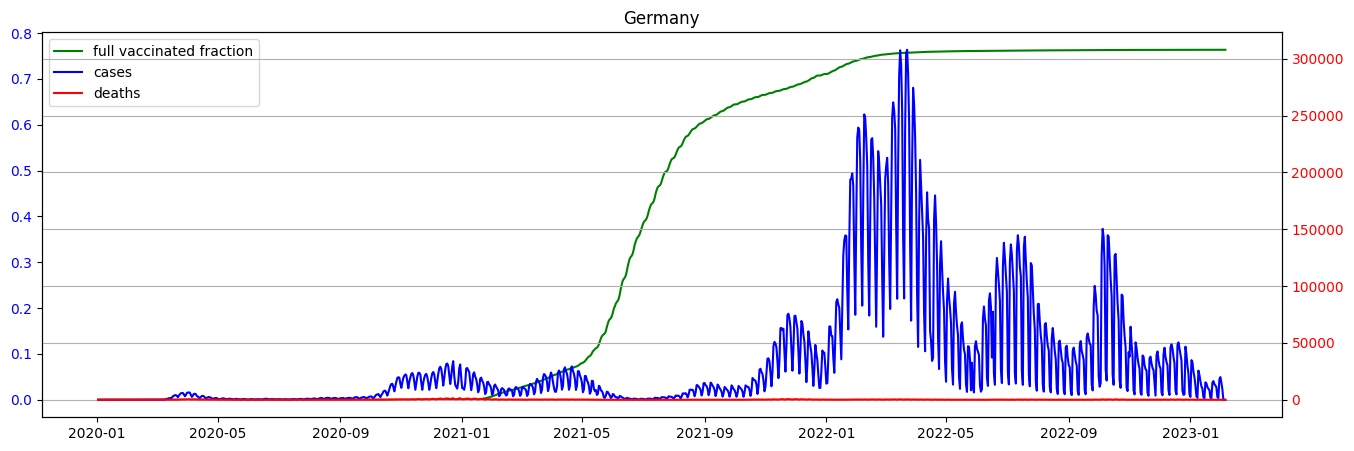

In [ ]:
#@title Visualize the Data
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (16,5)
fig, ax1 = plt.subplots()

ln1 = ax1.plot(vaccine_covid.date, vaccine_covid.full_dose_frac, label='full vaccinated fraction', color='g')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
# ax2.set_yscale('log')
ln2 = ax2.plot(vaccine_covid.date, vaccine_covid.cases, label='cases', color='b')
ln3 = ax2.plot(vaccine_covid.date, vaccine_covid.deaths, label='deaths', color='r')
ax2.tick_params(axis='y', labelcolor='r')

lns = ln1+ln2+ln3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

plt.title("Germany")
plt.grid()
plt.show()

In [ ]:
#@title Required Packages for Time-Series Model
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import statsmodels.api as sm
from pandas import DataFrame , concat
from sklearn.metrics import mean_absolute_error , mean_squared_error
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from numpy import mean , concatenate
from math import sqrt
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Activation
from numpy import array , hstack
from tensorflow import keras
import tensorflow as tf

In [ ]:
#@title Nomalization of the Data

# Change the order of the dataset so the label place in last column
cases_order = ['first_dose_frac','full_dose_frac','deaths','recovered','cases']

dataset = vaccine_covid[cases_order].astype('float64').values

# Normalization of the data
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

In the time-series model, we will use the information of 30 days to predict the coming 15 days. The following model will shift the data so that current day cases will replace with future covid-19 new cases.

In [ ]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
  X, y = list(), list()
  for i in range(len(sequences)):
    # find the end of this pattern
    end_ix = i + n_steps_in
    out_end_ix = end_ix + n_steps_out-1
    # check if we are beyond the dataset
    if out_end_ix > len(sequences):
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)
# choose a number of time steps #change this accordingly
n_steps_in, n_steps_out = 30, 15
# covert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)
print("X.shape" , X.shape)
print("y.shape" , y.shape)

X.shape (1053, 30, 4)
y.shape (1053, 15)


In [ ]:
#@title Split the data

# In time-series problems, we can not sample randomly. Instead, we should take a chunk of data for the test set.
X_train, X_test = X[:400, :], X[400:, :]
y_train, y_test = y[:400, :], y[400:, :]

In [ ]:
#@title Model

#optimizer learning rate
opt = keras.optimizers.Adam(learning_rate=0.0001)
# define model
model = Sequential()
model.add(LSTM(10, activation='relu', return_sequences=True, input_shape=(30, 4)))
model.add(LSTM(10, activation='relu'))
model.add(Dense(128))
model.add(Dense(15))
model.add(Activation('relu'))
model.compile(loss='mse', optimizer=opt)


In [ ]:
#@title Training

# Fit network
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
#     tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    # tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]
history = model.fit(X_train, y_train, epochs=400, batch_size=100, verbose=1, validation_data=(X_test, y_test), shuffle=False, callbacks=my_callbacks)


Epoch 1/400
4/4 [==============================] - 3s 185ms/step - loss: 0.0012 - val_loss: 0.0670
Epoch 2/400
4/4 [==============================] - 0s 47ms/step - loss: 0.0012 - val_loss: 0.0667
Epoch 3/400
4/4 [==============================] - 0s 46ms/step - loss: 0.0012 - val_loss: 0.0663
Epoch 4/400
4/4 [==============================] - 0s 49ms/step - loss: 0.0011 - val_loss: 0.0659
Epoch 5/400
4/4 [==============================] - 0s 46ms/step - loss: 0.0011 - val_loss: 0.0656
Epoch 6/400
4/4 [==============================] - 0s 75ms/step - loss: 0.0011 - val_loss: 0.0651
Epoch 7/400
4/4 [==============================] - 0s 49ms/step - loss: 0.0011 - val_loss: 0.0647
Epoch 8/400
4/4 [==============================] - 0s 89ms/step - loss: 0.0010 - val_loss: 0.0643
Epoch 9/400
4/4 [==============================] - 0s 91ms/step - loss: 9.9549e-04 - val_loss: 0.0639
Epoch 10/400
4/4 [==============================] - 0s 92ms/step - loss: 9.6821e-04 - val_loss: 0.0635
Epoch 11/4